In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import model_selection
from sklearn import preprocessing
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

In [162]:
#Data
df = pd.read_csv("correct.csv")
dum = pd.get_dummies(df['city'])
df = pd.concat([dum,df],axis=1)
df = df.drop(columns = ['city'])
df = df.drop(columns = ['week_start_date'])
ef = pd.read_csv("dengue/dengue_labels_train.csv")
ef = ef.drop(columns = ['year','weekofyear','city'])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000256C78499B0>,
      dtype=object)

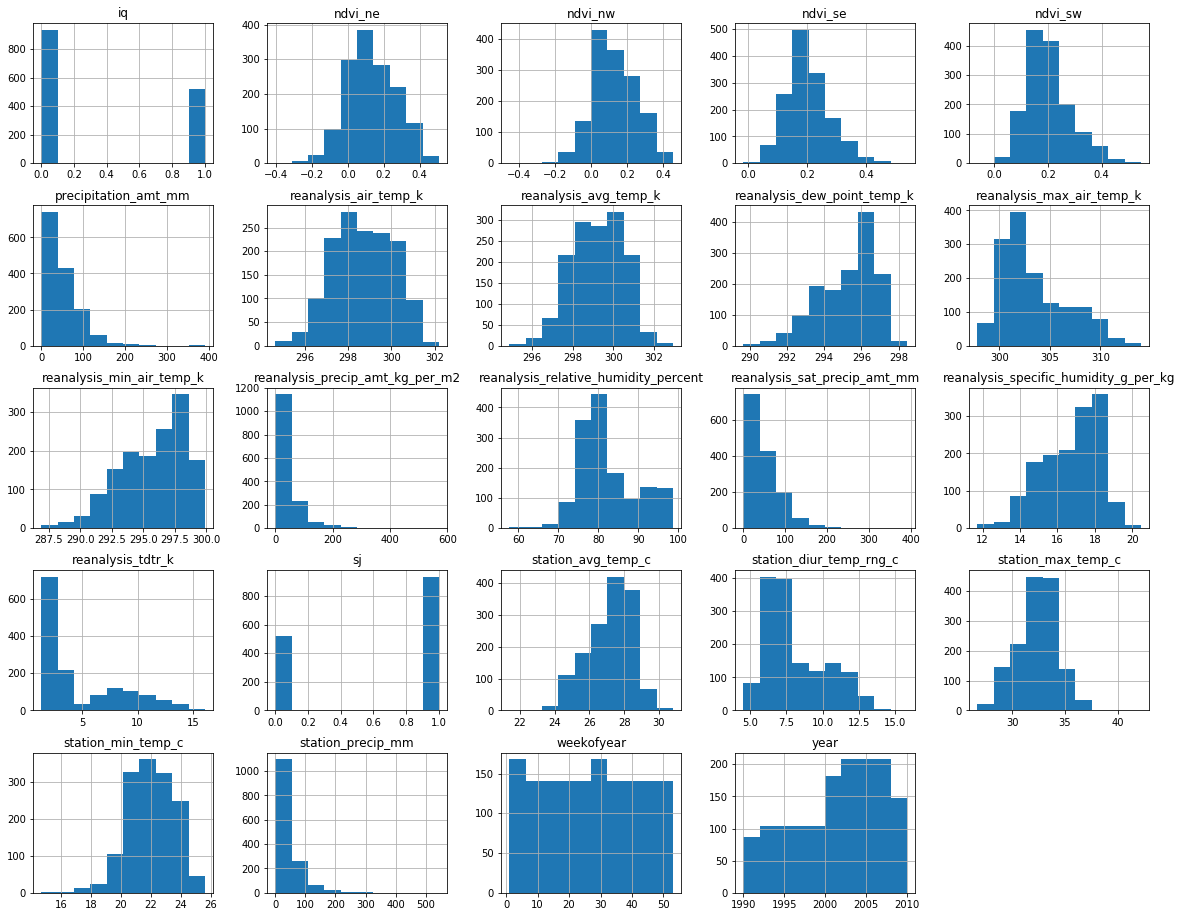

In [163]:
#histogram for all features
df.hist(figsize=(20,16))

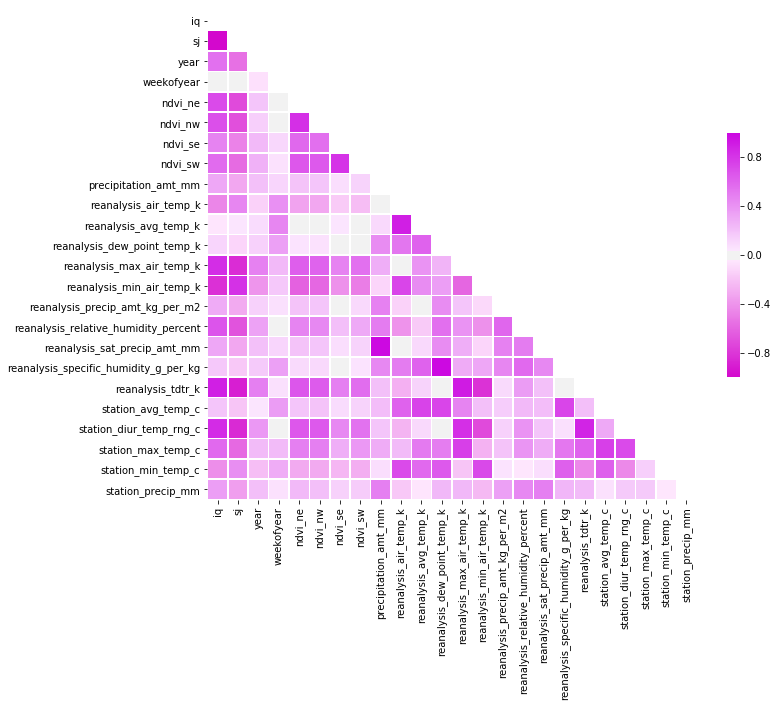

In [164]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(310, 300,s=99, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap,vmax = 1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [165]:
def add_interactions(df):
    # Get feature names
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + [' + '.join(x) for x in combos]
    
    # Find interactions
    poly = PolynomialFeatures(degree = 2,interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    return df
df = add_interactions(df)
print(df.head(5))

    iq   sj    year  weekofyear   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
0  0.0  1.0  1990.0        18.0  0.122600  0.103725  0.198483  0.177617   
1  0.0  1.0  1990.0        19.0  0.169900  0.142175  0.162357  0.155486   
2  0.0  1.0  1990.0        20.0  0.032250  0.172967  0.157200  0.170843   
3  0.0  1.0  1990.0        21.0  0.128633  0.245067  0.227557  0.235886   
4  0.0  1.0  1990.0        22.0  0.196200  0.262200  0.251200  0.247340   

   precipitation_amt_mm  reanalysis_air_temp_k  \
0                 12.42             297.572857   
1                 22.82             298.211429   
2                 34.54             298.781429   
3                 15.36             298.987143   
4                  7.52             299.518571   

                    ...                    \
0                   ...                     
1                   ...                     
2                   ...                     
3                   ...                     
4                   ...

In [166]:
from sklearn.cross_validation import train_test_split
import sklearn.feature_selection
from sklearn.preprocessing import MinMaxScaler
df = df.drop(columns = ['iq + sj'])
#medd = df.median()
#std = df.std()
maxx = df.max()
minn = df.min()
df = (df-minn)/(maxx - minn)
print(df.head())
X_train, X_test, y_train, y_test = train_test_split(df, ef, train_size=0.70, random_state=1)
select = sklearn.feature_selection.SelectKBest(k=50)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [df.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

    iq   sj  year  weekofyear   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
0  0.0  1.0   0.0    0.326923  0.578226  0.614835  0.386418  0.395544   
1  0.0  1.0   0.0    0.346154  0.629943  0.657063  0.321190  0.359233   
2  0.0  1.0   0.0    0.365385  0.479441  0.690881  0.311879  0.384430   
3  0.0  1.0   0.0    0.384615  0.584823  0.770066  0.438912  0.491150   
4  0.0  1.0   0.0    0.403846  0.658698  0.788882  0.481601  0.509943   

   precipitation_amt_mm  reanalysis_air_temp_k  \
0              0.031797               0.388291   
1              0.058423               0.472710   
2              0.088428               0.548064   
3              0.039324               0.575260   
4              0.019252               0.645515   

                    ...                    \
0                   ...                     
1                   ...                     
2                   ...                     
3                   ...                     
4                   ...            

C:\Users\User\Miniconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [167]:
print((colnames_selected))

['iq', 'sj', 'year', 'reanalysis_min_air_temp_k', 'reanalysis_tdtr_k', 'iq + year', 'iq + ndvi_ne', 'iq + ndvi_se', 'iq + ndvi_sw', 'iq + reanalysis_air_temp_k', 'iq + reanalysis_avg_temp_k', 'iq + reanalysis_dew_point_temp_k', 'iq + reanalysis_max_air_temp_k', 'iq + reanalysis_min_air_temp_k', 'iq + reanalysis_relative_humidity_percent', 'iq + reanalysis_specific_humidity_g_per_kg', 'iq + reanalysis_tdtr_k', 'iq + station_avg_temp_c', 'iq + station_diur_temp_rng_c', 'iq + station_max_temp_c', 'iq + station_min_temp_c', 'sj + year', 'sj + weekofyear', 'sj + ndvi_se', 'sj + reanalysis_air_temp_k', 'sj + reanalysis_avg_temp_k', 'sj + reanalysis_dew_point_temp_k', 'sj + reanalysis_max_air_temp_k', 'sj + reanalysis_min_air_temp_k', 'sj + reanalysis_relative_humidity_percent', 'sj + reanalysis_specific_humidity_g_per_kg', 'sj + station_avg_temp_c', 'sj + station_diur_temp_rng_c', 'sj + station_max_temp_c', 'sj + station_min_temp_c', 'year + reanalysis_min_air_temp_k', 'year + reanalysis_tdt

In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import  AdaBoostRegressor
from sklearn.ensemble import  BaggingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import BaggingClassifier

def find_model_perf(X_train, y_train, X_test, y_test,model):
    model.fit(X_train, y_train)
    y_hat = [int(max(x,0)) for x in model.predict(X_test)]
    print(model,"\n","testing error", mean_absolute_error(y_test,y_hat))
    print("\n")
    return  np.array(y_hat)

In [169]:
model = [HuberRegressor(),GradientBoostingRegressor(), AdaBoostRegressor()]
for mod in model:
    find_model_perf(X_train_selected, y_train, X_test_selected, y_test,mod)                

C:\Users\User\Miniconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Miniconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
        tol=1e-05, warm_start=False) 
 testing error 16.752860411899313


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False) 
 testing error 12.064073226544622


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) 
 testing error 24.562929061784896




C:\Users\User\Miniconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [110]:
FinalModel = GradientBoostingRegressor()
FinalModel.fit(X_train_selected,y_train)
FinalModel.fit(X_test_selected,y_test)

C:\Users\User\Miniconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Miniconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [111]:
#Data for inference
ind = pd.read_csv("Dengue/dengue_features_test.csv")
dum = pd.get_dummies(ind['city'])
ind = pd.concat([dum,ind],axis=1)
ind = ind.drop(columns = ['city'])
ind = ind.drop(columns = ['week_start_date'])

In [112]:
ind = ind.interpolate()
ind = add_interactions(ind)
ind = ind.drop(columns = ['iq + sj'])
#minn = ind.min()
#maxx = ind.max()
ind = (ind-minn)/(maxx-minn)



In [113]:
X_inf_selected = ind[colnames_selected]

In [114]:
y_inf2 = [int(max(x,0)) for x in FinalModel.predict(X_inf_selected)]
print(y_inf2)


[12, 9, 11, 55, 12, 38, 11, 17, 9, 19, 45, 11, 34, 40, 72, 52, 23, 55, 69, 59, 64, 34, 34, 39, 36, 26, 33, 53, 44, 25, 36, 10, 13, 11, 0, 17, 11, 12, 10, 13, 11, 13, 69, 67, 10, 8, 9, 13, 8, 8, 9, 11, 7, 8, 16, 8, 7, 9, 10, 8, 13, 12, 48, 31, 31, 51, 40, 47, 40, 27, 35, 18, 47, 68, 35, 41, 75, 67, 93, 90, 25, 43, 33, 14, 16, 12, 11, 14, 12, 14, 22, 11, 11, 25, 16, 12, 16, 13, 12, 16, 11, 11, 8, 8, 6, 13, 8, 39, 10, 28, 40, 59, 29, 69, 49, 54, 67, 66, 50, 47, 67, 36, 76, 159, 60, 65, 58, 63, 69, 62, 77, 32, 30, 35, 29, 26, 32, 22, 8, 13, 25, 20, 14, 12, 12, 11, 9, 10, 13, 11, 9, 9, 10, 7, 8, 10, 9, 7, 9, 8, 18, 14, 14, 31, 68, 64, 61, 61, 53, 61, 70, 92, 65, 161, 64, 50, 47, 29, 71, 70, 70, 61, 64, 77, 70, 63, 33, 29, 44, 40, 13, 13, 9, 14, 13, 18, 12, 12, 11, 12, 9, 33, 8, 10, 13, 5, 10, 8, 8, 7, 9, 12, 9, 10, 44, 41, 52, 40, 29, 53, 24, 48, 38, 63, 69, 41, 67, 40, 56, 38, 45, 40, 61, 73, 81, 66, 82, 90, 83, 25, 29, 19, 16, 12, 17, 12, 9, 10, 10, 9, 10, 10, 14, 9, 11, 13, 6, 10, 13, 8,

In [115]:
gf = pd.read_csv("Dengue/submission_format.csv")
mat = np.array(y_inf2)
gf['total_cases'] = pd.DataFrame(mat)
print(gf.head())
gf.to_csv("MLesem2.csv",index=False)

  city  year  weekofyear  total_cases
0   sj  2008          18           12
1   sj  2008          19            9
2   sj  2008          20           11
3   sj  2008          21           55
4   sj  2008          22           12
